# DBSCAN
Density-based Spatial Clustering *of* Applications *with* Noise 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class DBSCAN:
    
    # Params
    ε = 1
    min_sample = 3
    
    # Constructor
    def __init__(self, ε = 1, min_sample = 3):
        self.ε = ε
        self.min_sample = min_sample
      

    
    # Generate moon-shaped data using normal distribution smpling
    def generate_moon(self, centerX, centerY, face, N):
        dir = self.set_moon_direction(face)
        
        lowest_μ = [centerX + (dir * 4), centerY + (-3.5)]
        lower_μ = [centerX + (dir * 1.75), centerY + (-3)]
        center_μ = [centerX, centerY]
        upper_μ = [centerX + (dir * 1.75), centerY + 3]
        uppest_μ = [centerX + (dir * 4), centerY + 3.5]
        
        lowest_cov = [[2, 0], [0, 0.1]]
        lower_cov = [[1, dir * (-0.85)], [dir * (-0.85), 1]]
        center_cov = [[0.3, 0], [0, 2]]
        upper_cov = [[1, (dir * 0.85)], [dir * (0.85), 1]]
        uppest_cov = [[2, 0], [0, 0.1]]
        
        return np.concatenate([
            np.random.multivariate_normal(lowest_μ, lowest_cov, int(round(N/5,0))),
            np.random.multivariate_normal(lower_μ, lower_cov, int(round(N/5,0))),
            np.random.multivariate_normal(center_μ, center_cov, int(round(N/5,0))),
            np.random.multivariate_normal(upper_μ, upper_cov, int(round(N/5,0))),
            np.random.multivariate_normal(uppest_μ, uppest_cov, int(round(N/5,0))),
        ])
        
    
    # Moon direction setter
    def set_moon_direction(self, face):
        if face == 'right':
            return 1
        elif face == 'left':
            return -1
        
    # ε distance check function
    def ε_dist(self, p, q):
        return self.euclidian(p,q) < self.ε
    
    # Calculate Euclidian distance between two points
    def euclidian(self, p, q):
        return np.sqrt(np.power(q[0]-p[0],2) + np.power(q[1]-p[1],2))
    
    # Find nearest neighbor of a point
    def nearest_neighbor(self, data):
        distances = np.sqrt(data[:,np.newaxis,:] - data[np.newaxis,:,:])**2
        print(distances)


(-10.0, 10.0)

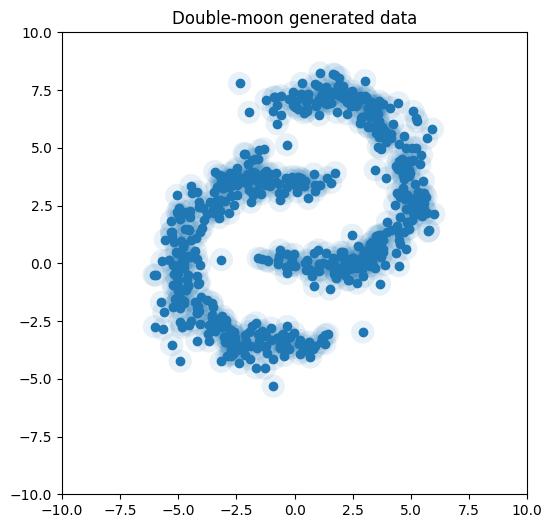

In [4]:
dbscan = DBSCAN(min_sample = 0.5)
right_moon = dbscan.generate_moon(-5,0,'right',300)
left_moon = dbscan.generate_moon(5,3.5,'left',300)
data = np.concatenate([right_moon, left_moon])


fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Double-moon generated data')
ax.scatter(data[:,0], data[:,1])
for item in data:
    ax.add_artist(plt.Circle((item[0], item[1]), dbscan.min_sample, alpha=0.1))
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)